
 # Databases

## PETE 2061 Lab 11

<a id='top'></a>

## Load required python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import pandas as pd
import sqlite3

%matplotlib inline   
#In Jupyter notebook, this makes matplotlib.pyplot generate a plot even the first time plot() is called

In [5]:
# Load spreadsheet
xl = pd.ExcelFile('DCAwells_Solved/DCAwells_Solved/DCA_Well 3.xlsx')
# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('DCARegression')

['DCARegression', 'DCA Forecast']


In [6]:
df1

,Decline Curve Analysis - Least Squares Fitting,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Qi,2690.68,vol/day,NaN,NaN,NaN,Objective Function Choice:,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Type of Residual:,Value Diff Squared,NaN,NaN
3,NaN,NaN,Di,2.28382,/year (Nominal rate),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,Percentage of Actual
4,NaN,NaN,b,1.42473,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Value Diff Squared
5,NaN,NaN,NaN,NaN,NaN,NaN,Residual Type:,NaN,NaN,8.81043e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Input Production Data,NaN,Computed From Regression,NaN,NaN,NaN,Residuals,NaN,Objective,...,NaN,NaN,NaN,NaN,NaN,NaN,Objective Function:,Monthly Residuals,NaN,NaN
7,Month,Monthly,Cumulative,Q at t,Np,Monthly,Weight,Monthly,Cum,Function,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Monthly Residuals
8,1,68168,68168,2273.67,75119.8,75119.8,1,4.83284e+07,4.83284e+07,4.83284e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cum residuals
9,2,82759.8,150928,1985.12,139693,64572.8,1,3.30764e+08,3.79093e+08,3.30764e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Both (Avg Monthly & Cum)


## Lab 11 (Create your new .ipynb or .py file )
* Using the code given in this workbook (or the db_manipulation.py), write a Python code that loops through all given 17 wells. In each iteration of the loop:
    * Insert the Decline curve analysis model parameters into the DCAparams table in the database
    * Insert the actual and model rates and cumulative production into the Rates table in the database
    * Plot and save a figure of the rate and cumulative production vs time (in months).
<br>    
Hint: You need to use the exponential model if b = 0, and the hyperbolic model otherwise.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
17
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']
['DCARegression', 'DCA Forecast']


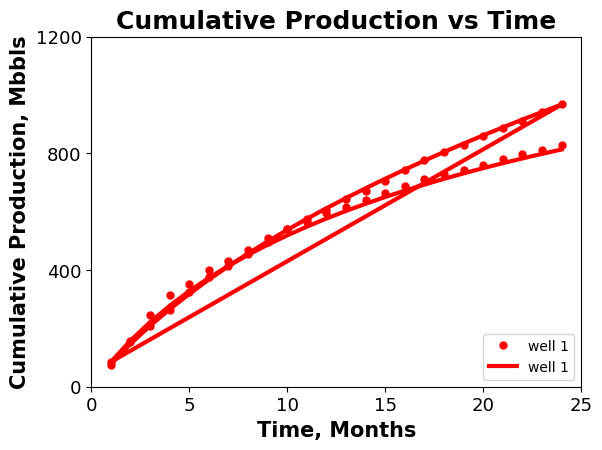

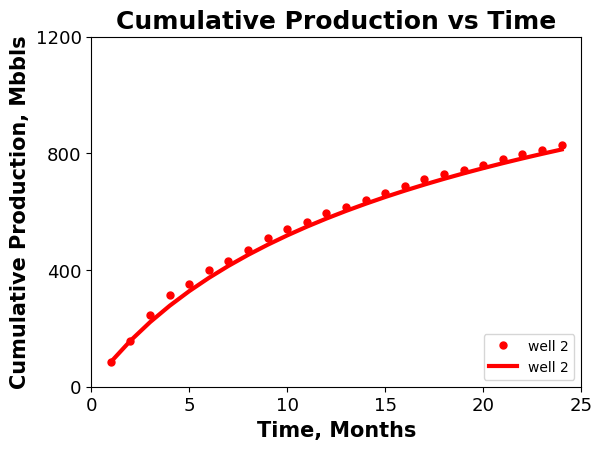

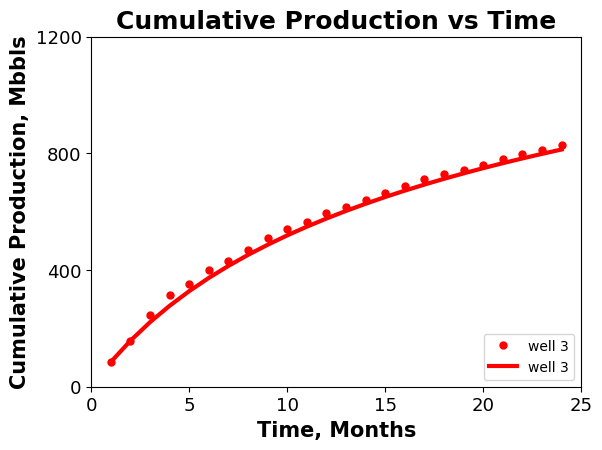

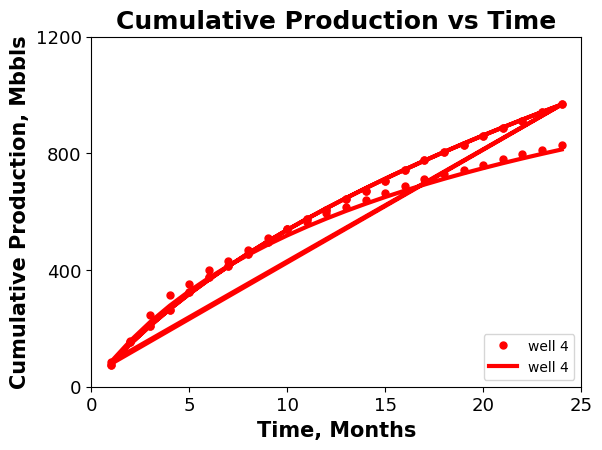

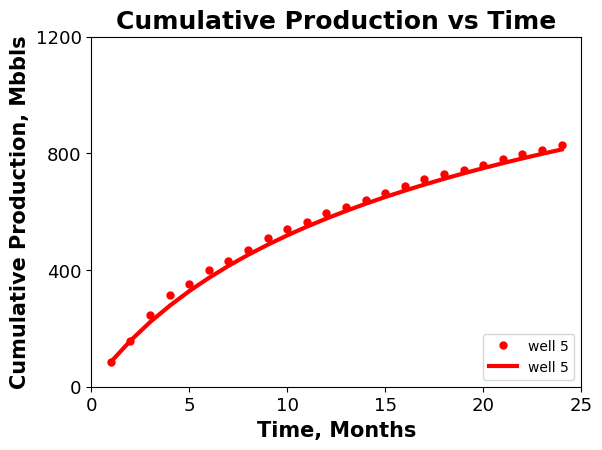

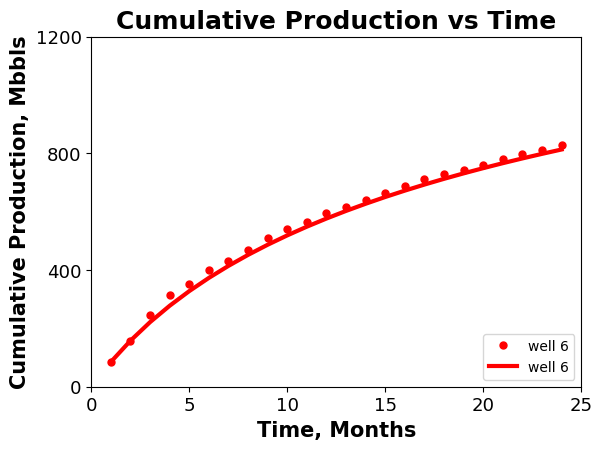

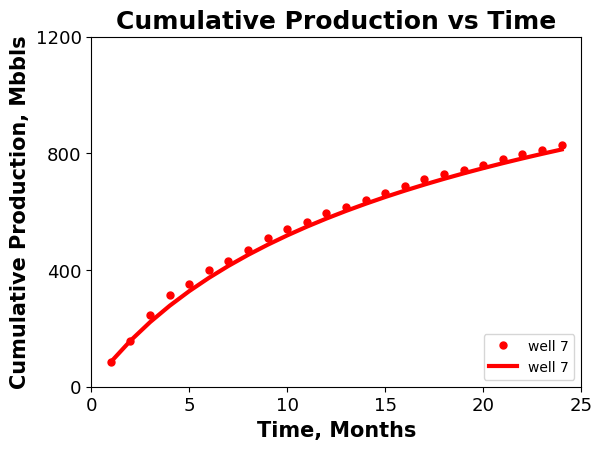

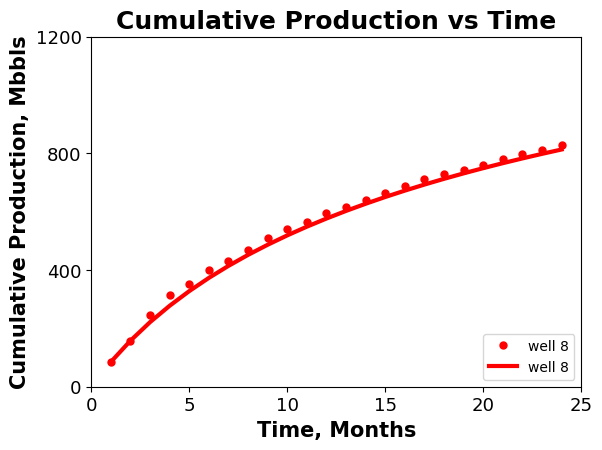

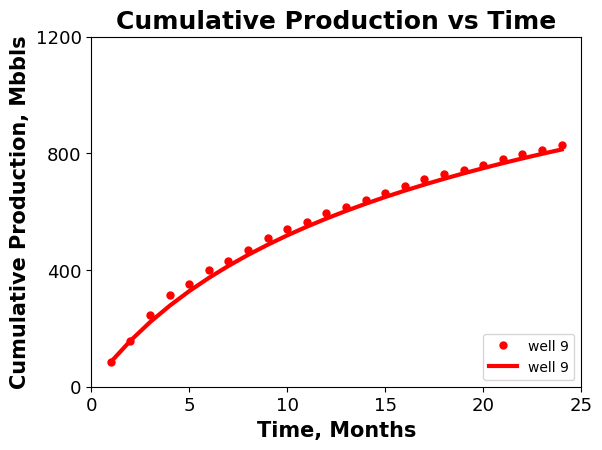

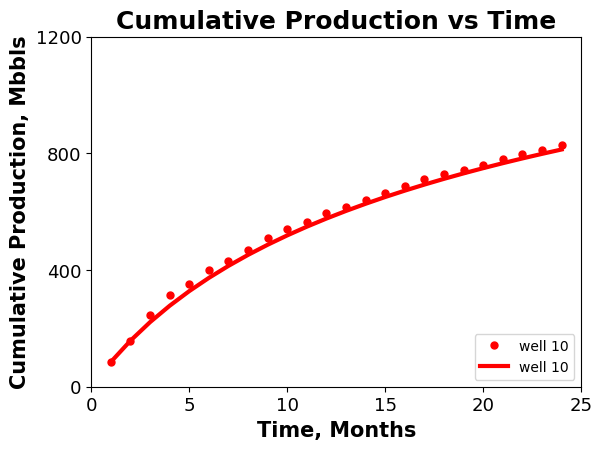

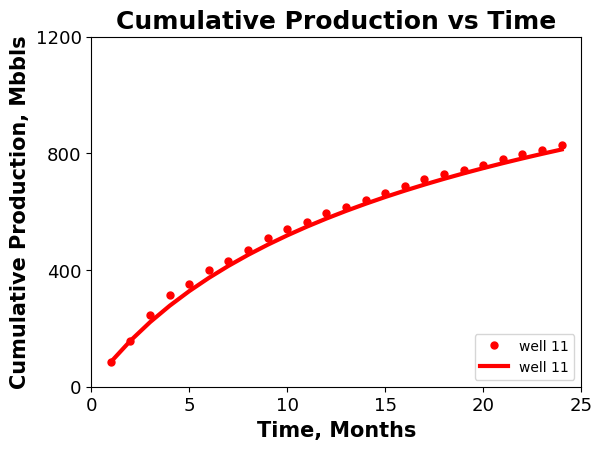

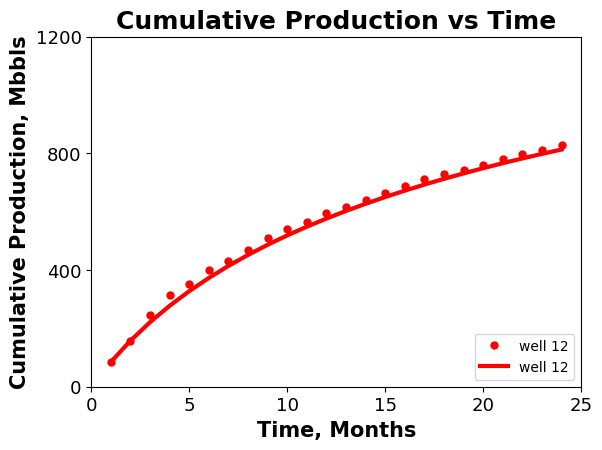

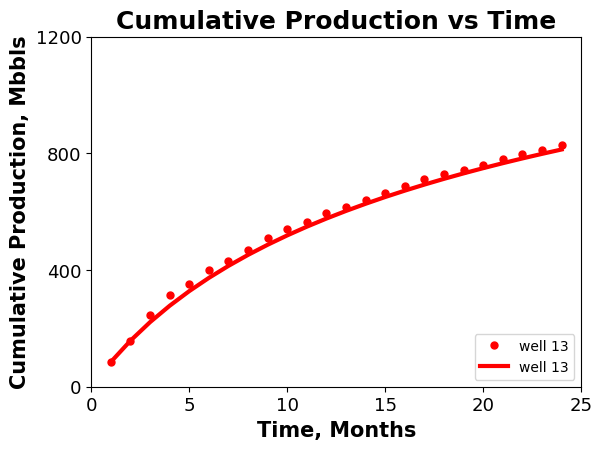

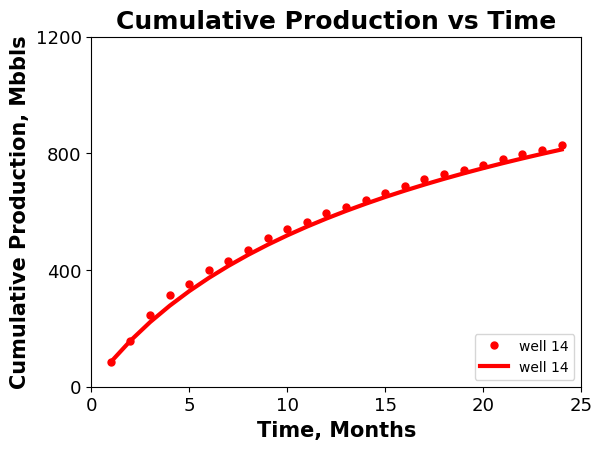

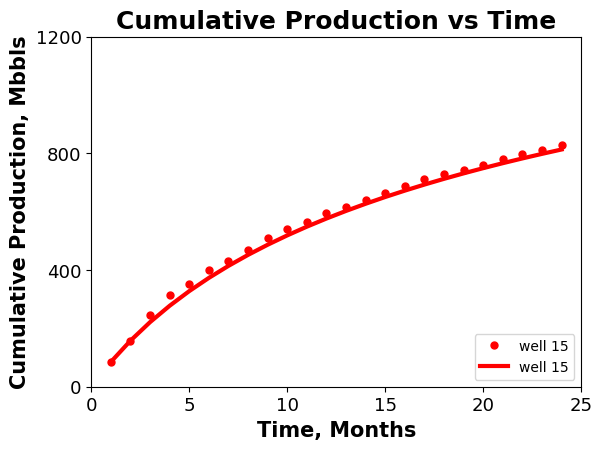

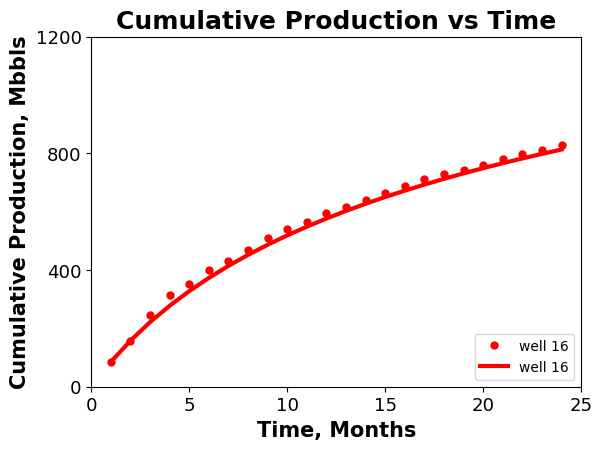

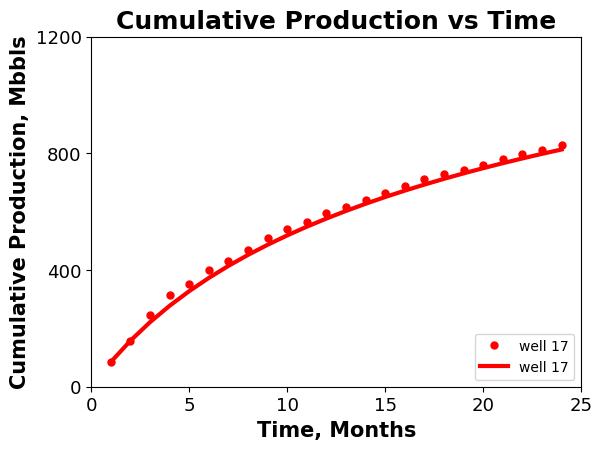

In [9]:
wellID = np.arange(1,18)
print(wellID)
i = len(wellID)
print(i)
df = xl.parse('DCARegression')
dfLength=24
for i in wellID:
    xl = pd.ExcelFile('DCAwells_Solved/DCAwells_Solved/DCA_Well 2.xlsx')
    files = 'DCAwells_Solved/DCAwells_Solved/DCA_Well ' + str(wellID) +'.xlsx'
    print(xl.sheet_names)
    df1 = xl.parse('DCARegression')
    wellID = i
    conn = sqlite3.connect("DCA.db")
    cur = conn.cursor()
    conn.commit()
    rateDF = pd.DataFrame({'wellID':wellID*np.ones(dfLength,dtype=int), 'time':range(1,dfLength+1),'rate':df1.iloc[8:32,1].values})
    rateDF['Cum'] = rateDF['rate'].cumsum()


    qi = df1.iloc[2,3]
    Di = df1.iloc[3,3]
    b  = df1.iloc[4,3]

    cur.execute("INSERT INTO DCAparams VALUES ({},{},{},{})".format(wellID, qi, Di, b))
    conn.commit()

    t = np.arange(1,dfLength+1)
    Di = Di/12  

    q = 30.4375*qi/((1 + b*Di*t)**(1/b))
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b))) #30.4375 = 365.125/12

    error_q = rateDF['rate'].values - q
    SSE_q = np.dot(error_q, error_q)

    errorNp = rateDF['Cum'].values - Np
    SSE_Np = np.dot(errorNp,errorNp)


    rateDF['q_model'] = q
    rateDF['Cum_model'] = Np

    rateDF.to_sql("Rates", conn, if_exists="append", index = False)

    df1 = pd.read_sql_query("SELECT * FROM Rates;", conn)
    df2 = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
   
    conn.close()

    conn = sqlite3.connect("DCA.db")

    df1 = pd.read_sql_query("SELECT * FROM Rates WHERE wellID = {};".format(wellID), conn)

    titleFontSize = 18
    axisLabelFontSize = 15
    axisNumFontSize = 13

    currFig = plt.figure(figsize=(7,5), dpi=100)


    axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])# left, bottom, width, height (range 0 to 1)

    axes.plot(df1['time'], df1['Cum']/1000, color="red", ls='None', marker='o', markersize=5,label = 'well '+str(wellID) )
    axes.plot(df1['time'], df1['Cum_model']/1000, color="red", lw=3, ls='-',label = 'well '+str(wellID) )
    axes.legend(loc=4)
    axes.set_title('Cumulative Production vs Time', fontsize=titleFontSize, fontweight='bold')
    axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold') # Notice the use of set_ to begin methods
    axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
    axes.set_ylim([0, 1200])
    axes.set_xlim([0, 25])
    xticks = range(0,30,5) #np.linspace(0,4000,5)
    axes.set_xticks(xticks)
    axes.set_xticklabels(xticks, fontsize=axisNumFontSize);

    yticks = [0, 400, 800, 1200]
    axes.set_yticks(yticks)
    axes.set_yticklabels(yticks, fontsize=axisNumFontSize);

    currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)




    def objFun(qi,Di,b,t):
        q = qi/((1 + b*Di*t)**(1/b))

        error_q = rateDF['rate'].values - 30.4375*q
        SSE_q = np.dot(error_q,error_q)
   
        return SSE_q

    SSE_q = objFun(qi,Di,b,t)
    i -= 1